## Loading Data and preparing for EDA.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = "C:/Users/Admin/OneDrive/Documents/Term 2/BANA 780/A4/ieee-fraud-detection/"
trainIdentityDF = pd.read_csv(path+'train_identity.csv') 
trainTransactionDF = pd.read_csv(path+'train_transaction.csv') 
testIdentityDF = pd.read_csv(path+'test_identity.csv')
testTransactionDF = pd.read_csv(path+'test_transaction.csv') 

In [3]:
print('train_transaction shape is: {}'.format(trainTransactionDF.shape))
print('train_identity shape is: {}'.format(trainIdentityDF.shape))

print('test_transaction shape is: {}'.format(testTransactionDF.shape))
print('test_identity shape is: {}'.format(testIdentityDF.shape))

train_transaction shape is: (590540, 394)
train_identity shape is: (144233, 41)
test_transaction shape is: (506691, 393)
test_identity shape is: (141907, 41)


In [4]:
train = pd.merge(trainTransactionDF, trainIdentityDF, how = 'left', on = 'TransactionID')

test = pd.merge(testTransactionDF, testIdentityDF, how = 'left', on = 'TransactionID')

In [5]:
train.shape

(590540, 434)

In [6]:
test.shape

(506691, 433)

In [7]:
del trainTransactionDF, trainIdentityDF, testTransactionDF, testIdentityDF

In [8]:
def different_columns(traincols, testcols):
    
    for i in traincols:
        
        if i not in testcols:
            
            print(i)
            
different_columns(train.columns, test.columns)

isFraud
id_01
id_02
id_03
id_04
id_05
id_06
id_07
id_08
id_09
id_10
id_11
id_12
id_13
id_14
id_15
id_16
id_17
id_18
id_19
id_20
id_21
id_22
id_23
id_24
id_25
id_26
id_27
id_28
id_29
id_30
id_31
id_32
id_33
id_34
id_35
id_36
id_37
id_38


In [9]:
test = test.rename(columns = {"id-01": "id_01", "id-02": "id_02", "id-03": "id_03", 
                            "id-06": "id_06", "id-05": "id_05", "id-04": "id_04", 
                            "id-07": "id_07", "id-08": "id_08", "id-09": "id_09", 
                            "id-10": "id_10", "id-11": "id_11", "id-12": "id_12", 
                            "id-15": "id_15", "id-14": "id_14", "id-13": "id_13", 
                            "id-16": "id_16", "id-17": "id_17", "id-18": "id_18", 
                            "id-21": "id_21", "id-20": "id_20", "id-19": "id_19", 
                            "id-22": "id_22", "id-23": "id_23", "id-24": "id_24", 
                            "id-27": "id_27", "id-26": "id_26", "id-25": "id_25", 
                            "id-28": "id_28", "id-29": "id_29", "id-30": "id_30", 
                            "id-31": "id_31", "id-32": "id_32", "id-33": "id_33", 
                            "id-34": "id_34", "id-35": "id_35", "id-36": "id_36", 
                            "id-37": "id_37", "id-38": "id_38"})
test.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
different_columns(train.columns, test.columns)

isFraud


## Performing EDA

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


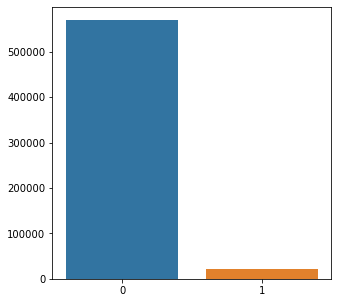

In [11]:
fig = plt.figure(figsize = (5, 5))

sns.barplot([0,1],train['isFraud'].value_counts().values)
plt.show()

<AxesSubplot:ylabel='None'>

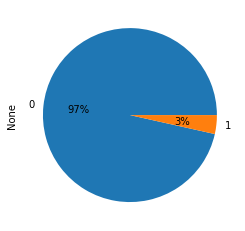

In [12]:
train.groupby(['isFraud']).size().plot.pie(autopct='%1.0f%%')

In [13]:
tot_missing_value = train.isnull().sum().sum()
print(tot_missing_value)

115523073


Text(0.5, 1.0, 'Train vs. Test TransactionDT Distribution')

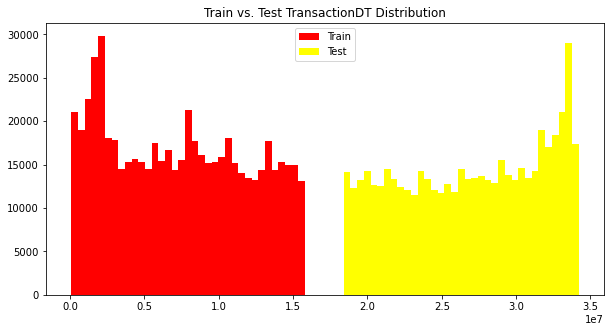

In [14]:
fig = plt.figure(figsize = (10, 5))

plt.hist(train['TransactionDT'], label = 'Train', bins = 35, color = 'red')
plt.hist(test['TransactionDT'], label = 'Test', bins = 35, color = 'yellow')
plt.legend()

plt.title('Train vs. Test TransactionDT Distribution')

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


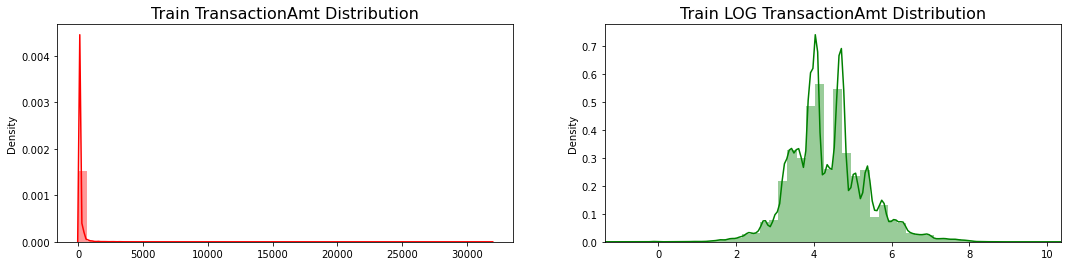

In [15]:
fig, ax = plt.subplots(1, 2, figsize = (18, 4))

time_val = train['TransactionAmt'].values

sns.distplot(time_val, ax = ax[0], color = 'red')
ax[0].set_title('Train TransactionAmt Distribution', fontsize = 16)
ax[1].set_xlim([min(time_val), max(time_val)])

sns.distplot(np.log(time_val), ax = ax[1], color = 'green')
ax[1].set_title('Train LOG TransactionAmt Distribution', fontsize = 16)
ax[1].set_xlim([min(np.log(time_val)), max(np.log(time_val))])

plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


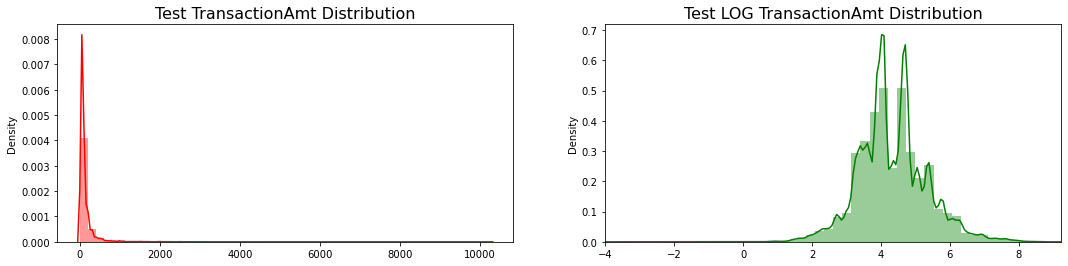

In [16]:
fig, ax = plt.subplots(1, 2, figsize = (18,4))

time_val = test['TransactionAmt'].values

sns.distplot(time_val, ax = ax[0], color = 'red')
ax[0].set_title('Test TransactionAmt Distribution', fontsize = 16)
ax[1].set_xlim([min(time_val), max(time_val)])

sns.distplot(np.log(time_val), ax = ax[1], color = 'green')
ax[1].set_title('Test LOG TransactionAmt Distribution', fontsize = 16)
ax[1].set_xlim([min(np.log(time_val)), max(np.log(time_val))])

plt.show()

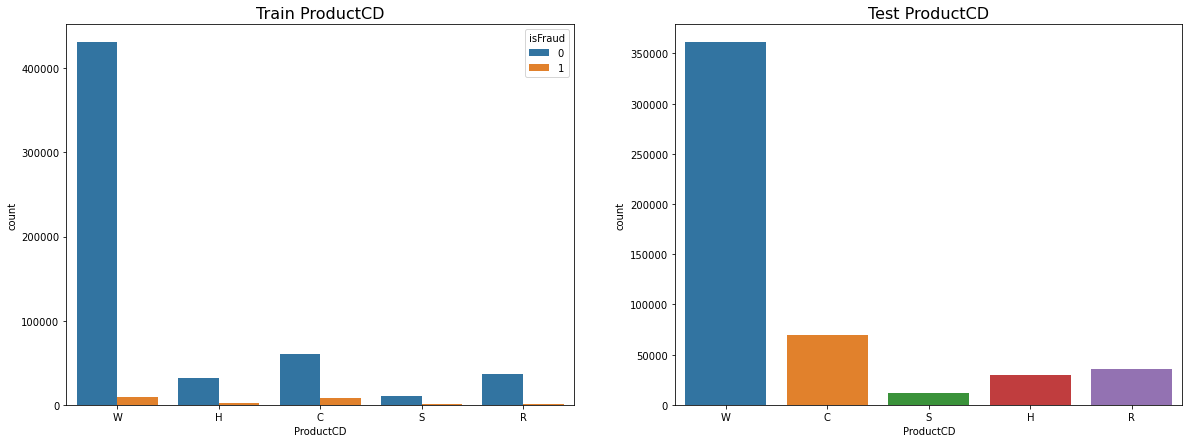

In [17]:
fig, ax = plt.subplots(1, 2, figsize = (20, 7))

sns.countplot(x = "ProductCD", ax = ax[0], hue = "isFraud", data = train)
ax[0].set_title('Train ProductCD', fontsize = 16)

sns.countplot(x = "ProductCD", ax = ax[1], data = test)
ax[1].set_title('Test ProductCD', fontsize = 16)

plt.show()

In [18]:
print(train['ProductCD'].value_counts())
print('\n-----------\n')
print(test['ProductCD'].value_counts())

W    439670
C     68519
R     37699
H     33024
S     11628
Name: ProductCD, dtype: int64

-----------

W    360987
C     69266
R     35647
H     29373
S     11418
Name: ProductCD, dtype: int64


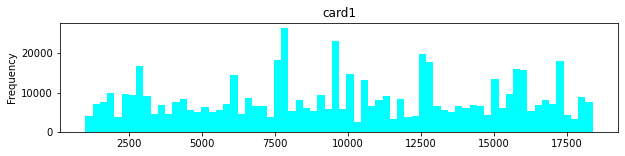

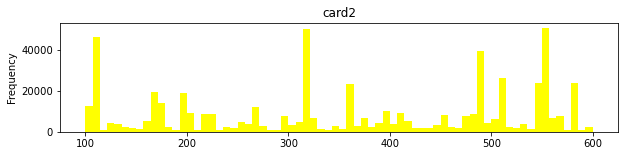

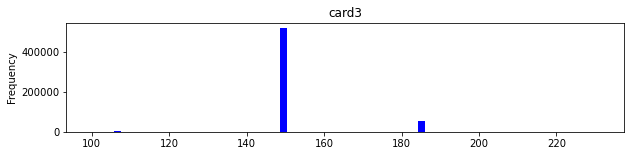

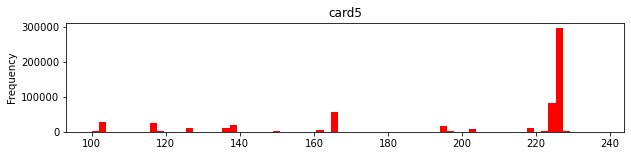

In [19]:
# Train Data

card_cols = ['card1', 'card2', 'card3', 'card4', 'card5', 'card6']
color_pal = ['cyan', 'yellow', 'blue', 'green', 'red']

color_idx = 0

for c in card_cols:
    
    if train[c].dtype in ['float64','int64']:
        
        train[c].plot(kind = 'hist',
                      title = c,
                      bins = 70,
                      figsize = (10, 2),
                      color = color_pal[color_idx])
    color_idx += 1
    
    plt.show()

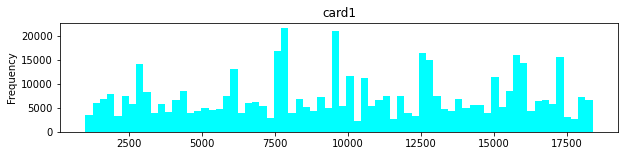

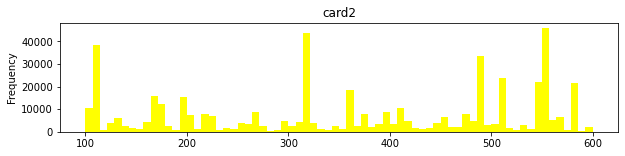

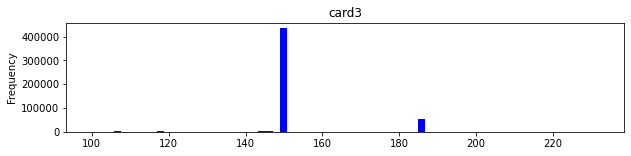

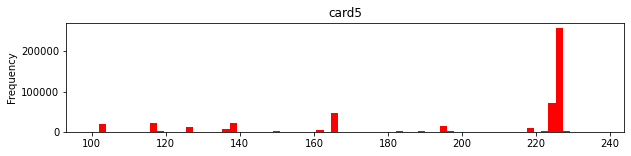

In [20]:
# Test Data

card_cols = ['card1', 'card2', 'card3', 'card4', 'card5', 'card6']
color_pal = ['cyan', 'yellow', 'blue', 'green', 'red']

color_idx = 0

for c in card_cols:
    
    if test[c].dtype in ['float64','int64']:
        
        test[c].plot( kind = 'hist',
                      title = c,
                      bins = 70,
                      figsize = (10, 2),
                      color = color_pal[color_idx])
    color_idx += 1
    
    plt.show()

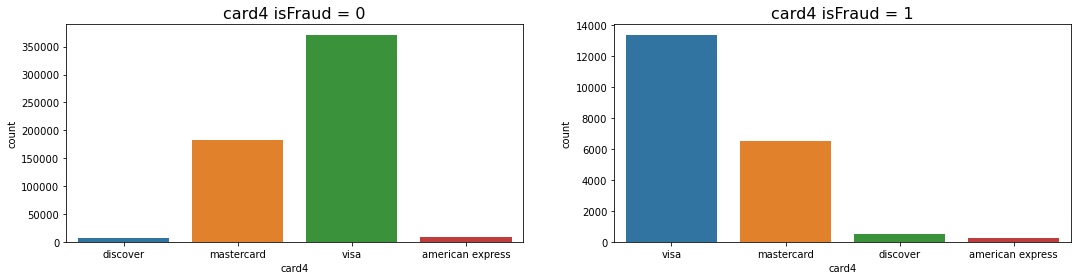

In [21]:
# card4

fig, ax = plt.subplots(1, 2, figsize = (18, 4))

sns.countplot(x = "card4", ax = ax[0], data = train.loc[train['isFraud'] == 0])
ax[0].set_title('card4 isFraud = 0', fontsize = 16)

sns.countplot(x = "card4", ax = ax[1], data = train.loc[train['isFraud'] == 1])
ax[1].set_title('card4 isFraud = 1', fontsize = 16)

plt.show()

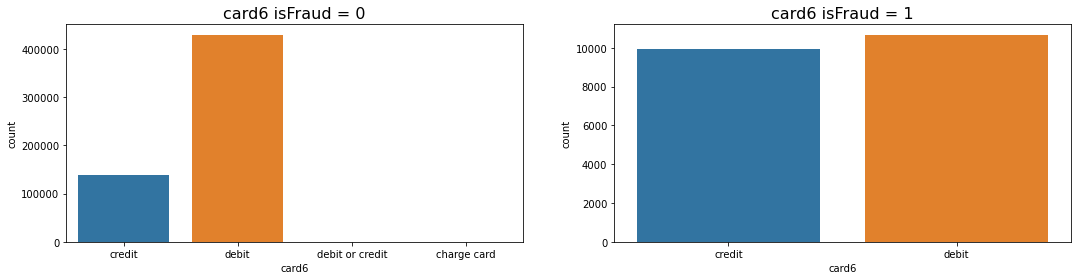

In [22]:
#card6

fig, ax = plt.subplots(1, 2, figsize = (18, 4))

sns.countplot(x = "card6", ax = ax[0], data = train.loc[train['isFraud'] == 0])
ax[0].set_title('card6 isFraud = 0', fontsize = 16)

sns.countplot(x = "card6", ax = ax[1], data = train.loc[train['isFraud'] == 1])
ax[1].set_title('card6 isFraud = 1', fontsize = 16)

plt.show()

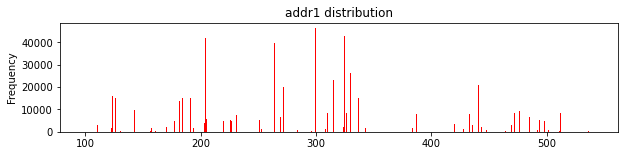

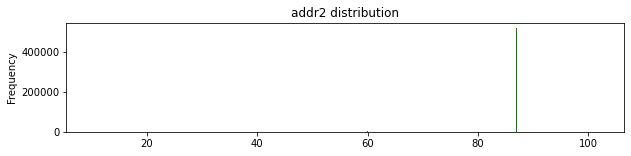

In [23]:
train['addr1'].plot(kind = 'hist', bins = 500, figsize = (10, 2), title = 'addr1 distribution', color = 'red')
plt.show()

train['addr2'].plot(kind = 'hist', bins = 500, figsize = (10, 2), title = 'addr2 distribution', color = 'green')
plt.show()

In [24]:
train['P_emaildomain'].value_counts()

gmail.com           228355
yahoo.com           100934
hotmail.com          45250
anonymous.com        36998
aol.com              28289
comcast.net           7888
icloud.com            6267
outlook.com           5096
msn.com               4092
att.net               4033
live.com              3041
sbcglobal.net         2970
verizon.net           2705
ymail.com             2396
bellsouth.net         1909
yahoo.com.mx          1543
me.com                1522
cox.net               1393
optonline.net         1011
charter.net            816
live.com.mx            749
rocketmail.com         664
mail.com               559
earthlink.net          514
gmail                  496
outlook.es             438
mac.com                436
juno.com               322
aim.com                315
roadrunner.com         305
windstream.net         305
hotmail.es             305
hotmail.fr             295
frontier.com           280
embarqmail.com         260
web.de                 240
twc.com                230
n

In [25]:
test['P_emaildomain'].value_counts()

gmail.com           207448
yahoo.com            81850
hotmail.com          40399
anonymous.com        34064
aol.com              24048
comcast.net           6586
icloud.com            6049
outlook.com           4838
att.net               3614
msn.com               3388
sbcglobal.net         2797
live.com              2679
verizon.net           2306
ymail.com             1679
bellsouth.net         1528
yahoo.com.mx          1284
cox.net               1264
me.com                1191
optonline.net          926
live.com.mx            721
charter.net            627
mail.com               597
gmail                  497
earthlink.net          465
rocketmail.com         441
mac.com                426
outlook.es             425
hotmail.fr             379
hotmail.es             322
frontier.com           314
roadrunner.com         278
web.de                 278
juno.com               252
windstream.net         247
hotmail.co.uk          222
twc.com                209
embarqmail.com         204
f

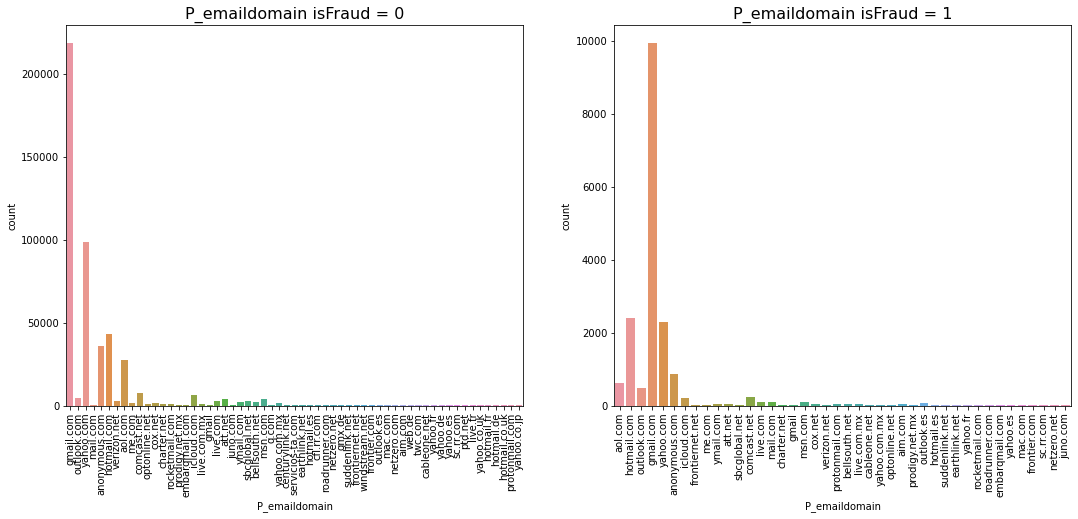

In [26]:
fig, ax = plt.subplots(1, 2, figsize = (18, 7))

sns.countplot(x = "P_emaildomain", ax = ax[0], data = train.loc[train['isFraud'] == 0])
ax[0].set_title('P_emaildomain isFraud = 0', fontsize = 16)
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation = 90)
sns.countplot(x = "P_emaildomain", ax = ax[1], data = train.loc[train['isFraud'] == 1])
ax[1].set_title('P_emaildomain isFraud = 1', fontsize = 16)
ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation = 90)

plt.show()

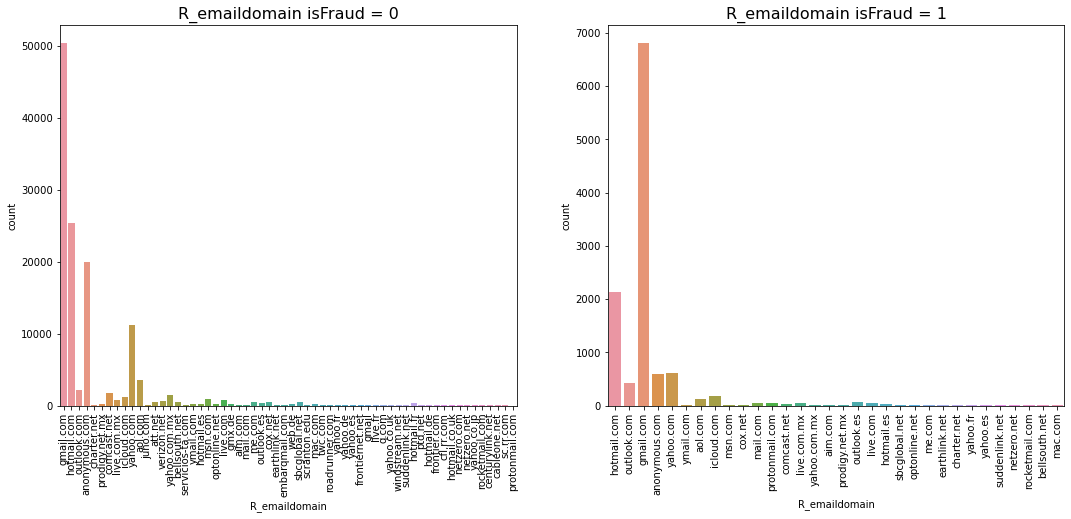

In [27]:
fig, ax = plt.subplots(1, 2, figsize = (18, 7))

sns.countplot(x = "R_emaildomain", ax = ax[0], data = train.loc[train['isFraud'] == 0])
ax[0].set_title('R_emaildomain isFraud = 0', fontsize = 16)
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation = 90)
sns.countplot(x = "R_emaildomain", ax = ax[1], data = train.loc[train['isFraud'] == 1])
ax[1].set_title('R_emaildomain isFraud = 1', fontsize = 16)
ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation = 90)

plt.show()

In [28]:
def getNulls(data):
    
    total = data.isnull().sum()
    percent = data.isnull().sum() / data.isnull().count()
    missing_data = pd.concat([total, percent], axis = 1, keys = ['total', 'precent'])
    
    return missing_data

In [29]:
missing_data_train = getNulls(train)
missing_data_train.head(train.shape[1]).T

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
total,0.0,0.0,0.0,0.0,0.0,0.0,8933.000000,1565.00000,1577.00000,4259.000000,...,450258.000000,512954.000000,517251.000000,512735.000000,449555.000000,449555.000000,449555.000000,449555.000000,449730.000000,471874.000000
precent,0.0,0.0,0.0,0.0,0.0,0.0,0.015127,0.00265,0.00267,0.007212,...,0.762451,0.868619,0.875895,0.868248,0.761261,0.761261,0.761261,0.761261,0.761557,0.799055


In [30]:
# Reducing memory
def detect_num_cols_to_shrink(list_of_num_cols, dataframe):
 
    convert_to_int8 = []
    convert_to_int16 = []
    convert_to_int32 = []
    
    #  sadly the datatype float8 does not exist
    convert_to_float16 = []
    convert_to_float32 = []
    
    for col in list_of_num_cols:
        
        if dataframe[col].dtype in ['int', 'int8', 'int32', 'int64']:
            
            describe_object = dataframe[col].describe()
            minimum = describe_object[3]
            maximum = describe_object[7]
            diff = abs(maximum - minimum)

            if diff < 255:
                convert_to_int8.append(col)
                
            elif diff < 65535:
                convert_to_int16.append(col)
                
            elif diff < 4294967295:
                convert_to_int32.append(col)   
                
        elif dataframe[col].dtype in ['float', 'float16', 'float32', 'float64']:
            
            describe_object = dataframe[col].describe()
            minimum = describe_object[3]
            maximum = describe_object[7]
            diff = abs(maximum - minimum)

            if diff < 65535:
                convert_to_float16.append(col)
                
            elif diff < 4294967295:
                convert_to_float32.append(col) 
        
    list_of_lists = []
    list_of_lists.append(convert_to_int8)
    list_of_lists.append(convert_to_int16)
    list_of_lists.append(convert_to_int32)
    list_of_lists.append(convert_to_float16)
    list_of_lists.append(convert_to_float32)
    
    return list_of_lists

In [31]:
num_train_cols = ['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'card1', 'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137', 'V138', 'V139', 'V140', 'V141', 'V142', 'V143', 'V144', 'V145', 'V146', 'V147', 'V148', 'V149', 'V150', 'V151', 'V152', 'V153', 'V154', 'V155', 'V156', 'V157', 'V158', 'V159', 'V160', 'V161', 'V162', 'V163', 'V164', 'V165', 'V166', 'V167', 'V168', 'V169', 'V170', 'V171', 'V172', 'V173', 'V174', 'V175', 'V176', 'V177', 'V178', 'V179', 'V180', 'V181', 'V182', 'V183', 'V184', 'V185', 'V186', 'V187', 'V188', 'V189', 'V190', 'V191', 'V192', 'V193', 'V194', 'V195', 'V196', 'V197', 'V198', 'V199', 'V200', 'V201', 'V202', 'V203', 'V204', 'V205', 'V206', 'V207', 'V208', 'V209', 'V210', 'V211', 'V212', 'V213', 'V214', 'V215', 'V216', 'V217', 'V218', 'V219', 'V220', 'V221', 'V222', 'V223', 'V224', 'V225', 'V226', 'V227', 'V228', 'V229', 'V230', 'V231', 'V232', 'V233', 'V234', 'V235', 'V236', 'V237', 'V238', 'V239', 'V240', 'V241', 'V242', 'V243', 'V244', 'V245', 'V246', 'V247', 'V248', 'V249', 'V250', 'V251', 'V252', 'V253', 'V254', 'V255', 'V256', 'V257', 'V258', 'V259', 'V260', 'V261', 'V262', 'V263', 'V264', 'V265', 'V266', 'V267', 'V268', 'V269', 'V270', 'V271', 'V272', 'V273', 'V274', 'V275', 'V276', 'V277', 'V278', 'V279', 'V280', 'V281', 'V282', 'V283', 'V284', 'V285', 'V286', 'V287', 'V288', 'V289', 'V290', 'V291', 'V292', 'V293', 'V294', 'V295', 'V296', 'V297', 'V298', 'V299', 'V300', 'V301', 'V302', 'V303', 'V304', 'V305', 'V306', 'V307', 'V308', 'V309', 'V310', 'V311', 'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320', 'V321', 'V322', 'V323', 'V324', 'V325', 'V326', 'V327', 'V328', 'V329', 'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338', 'V339', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_13', 'id_14', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_24', 'id_25', 'id_26', 'id_32']

In [32]:
num_cols_to_shrink_train = detect_num_cols_to_shrink(num_train_cols, train)

convert_to_int8 = num_cols_to_shrink_train[0]
convert_to_int16 = num_cols_to_shrink_train[1]
convert_to_int32 = num_cols_to_shrink_train[2]

convert_to_float16 = num_cols_to_shrink_train[3]
convert_to_float32 = num_cols_to_shrink_train[4]

print("convert_to_int8 :", convert_to_int8, "\n")
print("convert_to_int16 :", convert_to_int16, "\n")
print("convert_to_int32 :", convert_to_int32, "\n")

print("convert_to_float16 :", convert_to_float16, "\n")
print("convert_to_float32 :", convert_to_float32, "\n")

convert_to_int8 : ['isFraud'] 

convert_to_int16 : ['card1'] 

convert_to_int32 : ['TransactionID', 'TransactionDT'] 

convert_to_float16 : ['TransactionAmt', 'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V9

In [33]:
print("starting with converting process....")

for col in convert_to_int16:
    
    train[col] = train[col].astype('int16') 
    
for col in convert_to_int32:
    train[col] = train[col].astype('int32') 

for col in convert_to_float16:
    train[col] = train[col].astype('float16')
    
for col in convert_to_float32:
    train[col] = train[col].astype('float32')
    
print("successfully converted!")

starting with converting process....
successfully converted!


In [34]:
num_test_cols = ['TransactionID', 'TransactionDT', 'TransactionAmt', 'card1', 'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137', 'V138', 'V139', 'V140', 'V141', 'V142', 'V143', 'V144', 'V145', 'V146', 'V147', 'V148', 'V149', 'V150', 'V151', 'V152', 'V153', 'V154', 'V155', 'V156', 'V157', 'V158', 'V159', 'V160', 'V161', 'V162', 'V163', 'V164', 'V165', 'V166', 'V167', 'V168', 'V169', 'V170', 'V171', 'V172', 'V173', 'V174', 'V175', 'V176', 'V177', 'V178', 'V179', 'V180', 'V181', 'V182', 'V183', 'V184', 'V185', 'V186', 'V187', 'V188', 'V189', 'V190', 'V191', 'V192', 'V193', 'V194', 'V195', 'V196', 'V197', 'V198', 'V199', 'V200', 'V201', 'V202', 'V203', 'V204', 'V205', 'V206', 'V207', 'V208', 'V209', 'V210', 'V211', 'V212', 'V213', 'V214', 'V215', 'V216', 'V217', 'V218', 'V219', 'V220', 'V221', 'V222', 'V223', 'V224', 'V225', 'V226', 'V227', 'V228', 'V229', 'V230', 'V231', 'V232', 'V233', 'V234', 'V235', 'V236', 'V237', 'V238', 'V239', 'V240', 'V241', 'V242', 'V243', 'V244', 'V245', 'V246', 'V247', 'V248', 'V249', 'V250', 'V251', 'V252', 'V253', 'V254', 'V255', 'V256', 'V257', 'V258', 'V259', 'V260', 'V261', 'V262', 'V263', 'V264', 'V265', 'V266', 'V267', 'V268', 'V269', 'V270', 'V271', 'V272', 'V273', 'V274', 'V275', 'V276', 'V277', 'V278', 'V279', 'V280', 'V281', 'V282', 'V283', 'V284', 'V285', 'V286', 'V287', 'V288', 'V289', 'V290', 'V291', 'V292', 'V293', 'V294', 'V295', 'V296', 'V297', 'V298', 'V299', 'V300', 'V301', 'V302', 'V303', 'V304', 'V305', 'V306', 'V307', 'V308', 'V309', 'V310', 'V311', 'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320', 'V321', 'V322', 'V323', 'V324', 'V325', 'V326', 'V327', 'V328', 'V329', 'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338', 'V339', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_13', 'id_14', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_24', 'id_25', 'id_26', 'id_32']

In [35]:
num_cols_to_shrink_test = detect_num_cols_to_shrink(num_test_cols, test)

convert_to_int8 = num_cols_to_shrink_test[0]
convert_to_int16 = num_cols_to_shrink_test[1]
convert_to_int32 = num_cols_to_shrink_test[2]

convert_to_float16 = num_cols_to_shrink_test[3]
convert_to_float32 = num_cols_to_shrink_test[4]

print("convert_to_int8 :", convert_to_int8, "\n")
print("convert_to_int16 :", convert_to_int16, "\n")
print("convert_to_int32 :", convert_to_int32, "\n")

print("convert_to_float16 :", convert_to_float16, "\n")
print("convert_to_float32 :", convert_to_float32, "\n")

convert_to_int8 : [] 

convert_to_int16 : ['card1'] 

convert_to_int32 : ['TransactionID', 'TransactionDT'] 

convert_to_float16 : ['TransactionAmt', 'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94'

In [36]:
print("starting with converting process....")

for col in convert_to_int16:
    
    test[col] = test[col].astype('int16') 
    
for col in convert_to_int32:
    test[col] = test[col].astype('int32') 

for col in convert_to_float16:
    test[col] = test[col].astype('float16')
    
for col in convert_to_float32:
    test[col] = test[col].astype('float32')
    
print("successfully converted!")

starting with converting process....
successfully converted!


In [37]:
ntrain = train.shape[0]
ntest = test.shape[0]
all_data = pd.concat([train, test], axis = 0, sort = False)
all_data.shape

(1097231, 434)

## Feature Engineering

In [38]:
def add_device_type(df, new_columns=[]):
    df['DeviceInfo'] = df['DeviceInfo'].fillna('unknown_device').str.lower()
    
    df['device_name'] = df['DeviceInfo'].str.split('/', expand=True)[0]

    df.loc[df['device_name'].str.contains('SM', na=False), 'device_name'] = 'Samsung'
    df.loc[df['device_name'].str.contains('sm', na=False), 'device_name'] = 'Samsung'
    df.loc[df['device_name'].str.contains('SAMSUNG', na=False), 'device_name'] = 'Samsung'
    df.loc[df['device_name'].str.contains('samsung', na=False), 'device_name'] = 'Samsung'
    df.loc[df['device_name'].str.contains('GT-', na=False), 'device_name'] = 'Samsung'
    df.loc[df['device_name'].str.contains('Moto G', na=False), 'device_name'] = 'Motorola'
    df.loc[df['device_name'].str.contains('Moto', na=False), 'device_name'] = 'Motorola'
    df.loc[df['device_name'].str.contains('moto', na=False), 'device_name'] = 'Motorola'
    df.loc[df['device_name'].str.contains('LG-', na=False), 'device_name'] = 'LG'
    df.loc[df['device_name'].str.contains('lg-', na=False), 'device_name'] = 'LG'
    df.loc[df['device_name'].str.contains('rv:', na=False), 'device_name'] = 'RV'
    df.loc[df['device_name'].str.contains('HUAWEI', na=False), 'device_name'] = 'Huawei'
    df.loc[df['device_name'].str.contains('huawei', na=False), 'device_name'] = 'Huawei'
    df.loc[df['device_name'].str.contains('ALE-', na=False), 'device_name'] = 'Huawei'
    df.loc[df['device_name'].str.contains('-L', na=False), 'device_name'] = 'Huawei'
    df.loc[df['device_name'].str.contains('Blade', na=False), 'device_name'] = 'ZTE'
    df.loc[df['device_name'].str.contains('BLADE', na=False), 'device_name'] = 'ZTE'
    df.loc[df['device_name'].str.contains('Linux', na=False), 'device_name'] = 'Linux'
    df.loc[df['device_name'].str.contains('XT', na=False), 'device_name'] = 'Sony'
    df.loc[df['device_name'].str.contains('HTC', na=False), 'device_name'] = 'HTC'
    df.loc[df['device_name'].str.contains('ASUS', na=False), 'device_name'] = 'Asus'
    df.loc[df['device_name'].str.contains('windows', na=False), 'device_name'] = 'Windows'
    df.loc[df['device_name'].str.contains('linux', na=False), 'device_name'] = 'Linux'
    df.loc[df['device_name'].str.contains('unknown', na=False), 'device_name'] = 'Others'
    df.loc[df.device_name.isin(df.device_name.value_counts()[df.device_name.value_counts() < 200].index), 'device_name'] = "Others"
    
    df['had_id'] = 1
   
    
    new_columns += ['device_name']
    return df

In [39]:
def add_browser(df, new_columns=[]):
    df["lastest_browser"] = np.zeros(df.shape[0])
    df.loc[df["id_31"] == "samsung browser 7.0",'lastest_browser']=1
    df.loc[df["id_31"] == "opera 53.0",'lastest_browser']=1
    df.loc[df["id_31"] == "mobile safari 10.0",'lastest_browser']=1
    df.loc[df["id_31"] == "google search application 49.0",'lastest_browser']=1
    df.loc[df["id_31"] == "firefox 60.0",'lastest_browser']=1
    df.loc[df["id_31"] == "edge 17.0",'lastest_browser']=1
    df.loc[df["id_31"] == "chrome 69.0",'lastest_browser']=1
    df.loc[df["id_31"] == "chrome 67.0 for android",'lastest_browser']=1
    df.loc[df["id_31"] == "chrome 63.0 for android",'lastest_browser']=1
    df.loc[df["id_31"] == "chrome 63.0 for ios",'lastest_browser']=1
    df.loc[df["id_31"] == "chrome 64.0",'lastest_browser']=1
    df.loc[df["id_31"] == "chrome 64.0 for android",'lastest_browser']=1
    df.loc[df["id_31"] == "chrome 64.0 for ios",'lastest_browser']=1
    df.loc[df["id_31"] == "chrome 65.0",'lastest_browser']=1
    df.loc[df["id_31"] == "chrome 65.0 for android",'lastest_browser']=1
    df.loc[df["id_31"] == "chrome 65.0 for ios",'lastest_browser']=1
    df.loc[df["id_31"] == "chrome 66.0",'lastest_browser']=1
    df.loc[df["id_31"] == "chrome 66.0 for android",'lastest_browser']=1
    df.loc[df["id_31"] == "chrome 66.0 for ios",'lastest_browser']=1

    new_columns += ['lastest_browser']
    return df

In [40]:
emails = {'gmail': 'google', 'att.net': 'att', 'twc.com': 'spectrum', 'scranton.edu': 'other', 'optonline.net': 'other',
          'hotmail.co.uk': 'microsoft', 'comcast.net': 'other', 'yahoo.com.mx': 'yahoo', 'yahoo.fr': 'yahoo',
          'yahoo.es': 'yahoo', 'charter.net': 'spectrum', 'live.com': 'microsoft', 'aim.com': 'aol', 'hotmail.de': 'microsoft',
          'centurylink.net': 'centurylink', 'gmail.com': 'google', 'me.com': 'apple', 'earthlink.net': 'other', 
          'gmx.de': 'other', 'web.de': 'other', 'cfl.rr.com': 'other', 'hotmail.com': 'microsoft', 'protonmail.com': 'other',
          'hotmail.fr': 'microsoft', 'windstream.net': 'other', 'outlook.es': 'microsoft', 'yahoo.co.jp': 'yahoo',
          'yahoo.de': 'yahoo', 'servicios-ta.com': 'other', 'netzero.net': 'other', 'suddenlink.net': 'other',
          'roadrunner.com': 'other', 'sc.rr.com': 'other', 'live.fr': 'microsoft', 'verizon.net': 'yahoo',
          'msn.com': 'microsoft', 'q.com': 'centurylink', 'prodigy.net.mx': 'att', 'frontier.com': 'yahoo',
          'anonymous.com': 'other', 'rocketmail.com': 'yahoo', 'sbcglobal.net': 'att', 'frontiernet.net': 'yahoo',
          'ymail.com': 'yahoo', 'outlook.com': 'microsoft', 'mail.com': 'other', 'bellsouth.net': 'other',
          'embarqmail.com': 'centurylink', 'cableone.net': 'other', 'hotmail.es': 'microsoft', 'mac.com': 'apple',
          'yahoo.co.uk': 'yahoo', 'netzero.com': 'other', 'yahoo.com': 'yahoo', 'live.com.mx': 'microsoft', 'ptd.net': 'other',
          'cox.net': 'other', 'aol.com': 'aol', 'juno.com': 'other', 'icloud.com': 'apple'}

us_emails = ['gmail', 'net', 'edu']

def add_domain_1(df, new_columns=[]):
    for c in ['P_emaildomain', 'R_emaildomain']:
        df[c + '_bin'] = df[c].map(emails)
        df[c + '_suffix'] = df[c].map(lambda x: str(x).split('.')[-1])
        df[c + '_suffix'] = df[c + '_suffix'].map(lambda x: x if str(x) not in us_emails else 'us')

    new_columns += ['P_emaildomain_bin', 'P_emaildomain_suffix', 'R_emaildomain_bin', 'R_emaildomain_suffix']
    return df

In [41]:
def log_trans(df, new_columns=[]):
    df['LogTransactionAmt'] = np.log1p(df['TransactionAmt'])
    df['TransactionAmt_decimal'] = ((df['TransactionAmt'] - df['TransactionAmt'].astype(int)) * 1000).astype(int)
    new_columns += ['LogTransactionAmt','TransactionAmt_decimal']
    return df

In [42]:
def add_time_features(df, new_columns=[]):
    df['Transaction_day_of_week'] = np.floor((df['TransactionDT'] / (3600 * 24) - 1) % 7)
    df['Transaction_hour_of_day'] = np.floor(df['TransactionDT'] / 3600) % 24
    
   
    
    new_columns += ['Transaction_day_of_week', 'Transaction_hour_of_day']
    return df

In [43]:
def add_new_features(df):
    new_features = []
    df = log_trans(df, new_features)
    
    df = add_time_features(df, new_features)

    df = add_domain_1(df, new_features)
   
    df = add_browser(df, new_features)
    df = add_device_type(df, new_features)

    return df, new_features

In [44]:
all_data, new_features = add_new_features(all_data)
print(len(new_features))
print(all_data.shape)

10
(1097231, 445)


In [45]:
new_features

['LogTransactionAmt',
 'TransactionAmt_decimal',
 'Transaction_day_of_week',
 'Transaction_hour_of_day',
 'P_emaildomain_bin',
 'P_emaildomain_suffix',
 'R_emaildomain_bin',
 'R_emaildomain_suffix',
 'lastest_browser',
 'device_name']

In [46]:
all_data[new_features].head()

,LogTransactionAmt,TransactionAmt_decimal,Transaction_day_of_week,Transaction_hour_of_day,P_emaildomain_bin,P_emaildomain_suffix,R_emaildomain_bin,R_emaildomain_suffix,lastest_browser,device_name
0,4.242188,500,0.0,0.0,NaN,nan,NaN,nan,0.0,Others
1,3.400391,0,0.0,0.0,google,com,NaN,nan,0.0,Others
2,4.093750,0,0.0,0.0,microsoft,com,NaN,nan,0.0,Others
3,3.931641,0,0.0,0.0,yahoo,com,NaN,nan,0.0,Others
4,3.931641,0,0.0,0.0,google,com,NaN,nan,0.0,Samsung


In [47]:
missing_data_new = getNulls(all_data[new_features])
missing_data_new.head(all_data[new_features].shape[1]).T

,LogTransactionAmt,TransactionAmt_decimal,Transaction_day_of_week,Transaction_hour_of_day,P_emaildomain_bin,P_emaildomain_suffix,R_emaildomain_bin,R_emaildomain_suffix,lastest_browser,device_name
total,0.0,0.0,0.0,0.0,163648.000000,0.0,824070.000000,0.0,0.0,0.0
precent,0.0,0.0,0.0,0.0,0.149146,0.0,0.751045,0.0,0.0,0.0


In [48]:
new_data_cols = new_features

for i in new_data_cols:
    
    if all_data[i].dtype == 'object':
        
        all_data[i] = all_data[i].fillna('Unknown')

In [49]:
all_data.P_emaildomain_suffix = np.where(all_data.P_emaildomain_suffix == 'nan','Unknown',all_data.P_emaildomain_suffix)
all_data.R_emaildomain_suffix = np.where(all_data.R_emaildomain_suffix == 'nan','Unknown',all_data.R_emaildomain_suffix)


In [50]:
all_data.drop(['TransactionAmt','P_emaildomain','R_emaildomain','id_31','DeviceInfo','TransactionDT'], axis = 1, inplace = True)

In [51]:
train = all_data[ : ntrain]
test = all_data[ntrain : ]

In [52]:
missing_data_train = getNulls(train)
missing_data_train.head(train.shape[1]).T

,TransactionID,isFraud,ProductCD,card1,card2,card3,card4,card5,card6,addr1,...,TransactionAmt_decimal,Transaction_day_of_week,Transaction_hour_of_day,P_emaildomain_bin,P_emaildomain_suffix,R_emaildomain_bin,R_emaildomain_suffix,lastest_browser,device_name,had_id
total,0.0,0.0,0.0,0.0,8933.000000,1565.00000,1577.00000,4259.000000,1571.00000,65706.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
precent,0.0,0.0,0.0,0.0,0.015127,0.00265,0.00267,0.007212,0.00266,0.111264,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
sel_cols = missing_data_train[missing_data_train['total'] > 200000].index

In [54]:
train.drop(sel_cols, axis = 1, inplace = True)
test.drop(sel_cols, axis = 1, inplace = True)

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [55]:
missing_data_train = getNulls(train)
missing_data_train.head(train.shape[1]).T

,TransactionID,isFraud,ProductCD,card1,card2,card3,card4,card5,card6,addr1,...,TransactionAmt_decimal,Transaction_day_of_week,Transaction_hour_of_day,P_emaildomain_bin,P_emaildomain_suffix,R_emaildomain_bin,R_emaildomain_suffix,lastest_browser,device_name,had_id
total,0.0,0.0,0.0,0.0,8933.000000,1565.00000,1577.00000,4259.000000,1571.00000,65706.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
precent,0.0,0.0,0.0,0.0,0.015127,0.00265,0.00267,0.007212,0.00266,0.111264,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
missing_data_test = getNulls(test)
missing_data_test.head(test.shape[1]).T

,TransactionID,isFraud,ProductCD,card1,card2,card3,card4,card5,card6,addr1,...,TransactionAmt_decimal,Transaction_day_of_week,Transaction_hour_of_day,P_emaildomain_bin,P_emaildomain_suffix,R_emaildomain_bin,R_emaildomain_suffix,lastest_browser,device_name,had_id
total,0.0,506691.0,0.0,0.0,8654.000000,3002.000000,3086.00000,4547.000000,3007.000000,65609.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
precent,0.0,1.0,0.0,0.0,0.017079,0.005925,0.00609,0.008974,0.005935,0.129485,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
ntrain = train.shape[0]
ntest = test.shape[0]
all_data = pd.concat([train, test], axis = 0, sort = False)
all_data.shape

(1097231, 210)

In [58]:
all_data_cols = all_data.columns

for i in all_data_cols:
    
    if all_data[i].dtype == 'object':
        
        all_data[i] = all_data[i].fillna(all_data[i].mode()[0])

In [59]:
for i in all_data_cols:
    
    if (i.startswith("C") or (i.startswith("V"))) and all_data[i].isnull().sum() > 0:
        
        all_data[i] = all_data[i].fillna(all_data[i].mode()[0])
        
missing_data = getNulls(all_data)
missing_data.head(missing_data.shape[1]).T

,TransactionID,isFraud
total,0.0,506691.000000
precent,0.0,0.461791


In [60]:
all_data['card2'] = all_data['card2'].fillna(all_data['card2'].mode()[0])
all_data['card3'] = all_data['card3'].fillna(all_data['card3'].mode()[0])
all_data['card5'] = all_data['card5'].fillna(all_data['card5'].mode()[0])

In [61]:
all_data['D1'] = all_data['D1'].fillna(all_data['D1'].mode()[0])
all_data['D4'] = all_data['D4'].fillna(all_data['D4'].mode()[0])
all_data['D10'] = all_data['D10'].fillna(all_data['D10'].mode()[0])
all_data['D15'] = all_data['D15'].fillna(all_data['D15'].mode()[0])

In [62]:
all_data['addr1'] = all_data['addr1'].fillna(all_data['addr1'].mode()[0])
all_data['addr2'] = all_data['addr2'].fillna(all_data['addr2'].mode()[0])

In [63]:
missing_data = getNulls(all_data)
missing_data.head(all_data.shape[1]).T

,TransactionID,isFraud,ProductCD,card1,card2,card3,card4,card5,card6,addr1,...,TransactionAmt_decimal,Transaction_day_of_week,Transaction_hour_of_day,P_emaildomain_bin,P_emaildomain_suffix,R_emaildomain_bin,R_emaildomain_suffix,lastest_browser,device_name,had_id
total,0.0,506691.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
precent,0.0,0.461791,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)
all_data.head()

(1097231, 271)


,TransactionID,isFraud,card1,card2,card3,card5,addr1,addr2,C1,C2,...,device_name_Windows,device_name_ale-l23 build,device_name_ane-lx3,device_name_ane-lx3 build,device_name_cam-l03 build,device_name_ios device,device_name_macos,device_name_pra-lx3 build,device_name_rne-l03 build,device_name_trident
0,2987000,0.0,13926,321.0,150.0,142.0,315.0,87.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,2987001,0.0,2755,404.0,150.0,102.0,325.0,87.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,2987002,0.0,4663,490.0,150.0,166.0,330.0,87.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,2987003,0.0,18132,567.0,150.0,117.0,476.0,87.0,2.0,5.0,...,0,0,0,0,0,0,0,0,0,0
4,2987004,0.0,4497,514.0,150.0,102.0,420.0,87.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
train = all_data[ : ntrain]
test = all_data[ntrain : ]

In [66]:
print(train.isnull().sum().sum())

0


In [67]:
test.drop(['isFraud'], axis = 1, inplace = True)

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [68]:
target = train['isFraud']

In [69]:
test_id = test['TransactionID']

In [70]:
train.drop(['TransactionID', 'isFraud'], axis = 1, inplace = True)

In [71]:
test.drop(['TransactionID'], axis = 1, inplace = True)

In [72]:
different_columns(train.columns, test.columns)

In [73]:
del ntrain, ntest


In [74]:
n = (train.dtypes != 'object')

num_train_cols = list(n[n].index) 

print(num_train_cols)

['card1', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D4', 'D10', 'D15', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V126'

In [75]:
# Reducing memory usage
def detect_num_cols_to_shrink(list_of_num_cols, dataframe):
 
    convert_to_int8 = []
    convert_to_int16 = []
    convert_to_int32 = []
    
    #  sadly the datatype float8 does not exist
    convert_to_float16 = []
    convert_to_float32 = []
    
    for col in list_of_num_cols:
        
        if dataframe[col].dtype in ['int', 'int8', 'int32', 'int64']:
            
            describe_object = dataframe[col].describe()
            minimum = describe_object[3]
            maximum = describe_object[7]
            diff = abs(maximum - minimum)

            if diff < 255:
                convert_to_int8.append(col)
                
            elif diff < 65535:
                convert_to_int16.append(col)
                
            elif diff < 4294967295:
                convert_to_int32.append(col)   
                
        elif dataframe[col].dtype in ['float', 'float16', 'float32', 'float64']:
            
            describe_object = dataframe[col].describe()
            minimum = describe_object[3]
            maximum = describe_object[7]
            diff = abs(maximum - minimum)

            if diff < 65535:
                convert_to_float16.append(col)
                
            elif diff < 4294967295:
                convert_to_float32.append(col) 
        
    list_of_lists = []
    list_of_lists.append(convert_to_int8)
    list_of_lists.append(convert_to_int16)
    list_of_lists.append(convert_to_int32)
    list_of_lists.append(convert_to_float16)
    list_of_lists.append(convert_to_float32)
    
    return list_of_lists

In [76]:
num_cols_to_shrink_train = detect_num_cols_to_shrink(num_train_cols, train)

convert_to_int8 = num_cols_to_shrink_train[0]
convert_to_int16 = num_cols_to_shrink_train[1]
convert_to_int32 = num_cols_to_shrink_train[2]

convert_to_float16 = num_cols_to_shrink_train[3]
convert_to_float32 = num_cols_to_shrink_train[4]

print("convert_to_int8 :", convert_to_int8, "\n")
print("convert_to_int16 :", convert_to_int16, "\n")
print("convert_to_int32 :", convert_to_int32, "\n")

print("convert_to_float16 :", convert_to_float16, "\n")
print("convert_to_float32 :", convert_to_float32, "\n")

convert_to_int8 : ['had_id'] 

convert_to_int16 : ['TransactionAmt_decimal'] 

convert_to_int32 : [] 

convert_to_float16 : ['card2', 'card3', 'card5', 'addr1', 'addr2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D4', 'D10', 'D15', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V1

In [77]:
print("starting with converting process....")

for col in convert_to_int16:
    
    train[col] = train[col].astype('int16') 
    
for col in convert_to_int32:
    train[col] = train[col].astype('int32') 

for col in convert_to_float16:
    train[col] = train[col].astype('float16')
    
for col in convert_to_float32:
    train[col] = train[col].astype('float32')
    
print("successfully converted!")

starting with converting process....


<ipython-input-77-d4359070c678>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[col] = train[col].astype('int16')
<ipython-input-77-d4359070c678>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[col] = train[col].astype('float16')


successfully converted!


<ipython-input-77-d4359070c678>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[col] = train[col].astype('float32')


In [78]:
n = (test.dtypes != 'object')

num_test_cols = list(n[n].index) 

print(num_test_cols)

['card1', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D4', 'D10', 'D15', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V126'

In [79]:
num_cols_to_shrink_test = detect_num_cols_to_shrink(num_test_cols, test)

convert_to_int8 = num_cols_to_shrink_test[0]
convert_to_int16 = num_cols_to_shrink_test[1]
convert_to_int32 = num_cols_to_shrink_test[2]

convert_to_float16 = num_cols_to_shrink_test[3]
convert_to_float32 = num_cols_to_shrink_test[4]

print("convert_to_int8 :", convert_to_int8, "\n")
print("convert_to_int16 :", convert_to_int16, "\n")
print("convert_to_int32 :", convert_to_int32, "\n")

print("convert_to_float16 :", convert_to_float16, "\n")
print("convert_to_float32 :", convert_to_float32, "\n")

convert_to_int8 : ['had_id'] 

convert_to_int16 : ['TransactionAmt_decimal'] 

convert_to_int32 : [] 

convert_to_float16 : ['card2', 'card3', 'card5', 'addr1', 'addr2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D4', 'D10', 'D15', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V1

In [80]:
print("starting with converting process....")

for col in convert_to_int16:
    
    test[col] = test[col].astype('int16') 
    
for col in convert_to_int32:
    test[col] = test[col].astype('int32') 

for col in convert_to_float16:
    test[col] = test[col].astype('float16')
    
for col in convert_to_float32:
    test[col] = test[col].astype('float32')
    
print("successfully converted!")

starting with converting process....


<ipython-input-80-3f6163d5ea5f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[col] = test[col].astype('int16')
<ipython-input-80-3f6163d5ea5f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[col] = test[col].astype('float16')


successfully converted!


<ipython-input-80-3f6163d5ea5f>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[col] = test[col].astype('float32')


## Model Building and Comparison

In [81]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.ensemble import RandomForestRegressor
import time

In [82]:
X_train, X_test, y_train, y_test = train_test_split(train, target,
                                                    test_size=0.2,
                                                    random_state=123,
                                                    stratify=target)

In [83]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [84]:
df_models = pd.DataFrame(columns = ['Model Name', 'Accuracy', 'Time'])

In [85]:
from sklearn.ensemble import RandomForestClassifier

regressor = RandomForestClassifier(n_estimators=100, random_state=0,max_depth=5)

t0 = time.time()
regressor.fit(X_train, y_train)
td = time.time()-t0 


In [86]:
y_pred = regressor.predict(X_test)

In [87]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98    113975
         1.0       0.89      0.13      0.22      4133

    accuracy                           0.97    118108
   macro avg       0.93      0.56      0.60    118108
weighted avg       0.97      0.97      0.96    118108

Accuracy:
0.9689267450130389

Confusion Matrix:


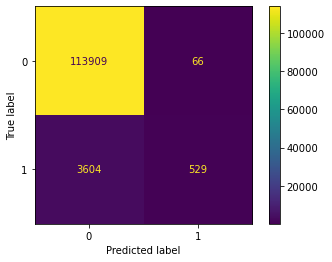

In [88]:


cm=confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()


print('Classification Report:')
print(classification_report(y_test,y_pred))

print('Accuracy:')
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
print()
print('Confusion Matrix:')
model_values = {'Model Name': 'RandomForestClassifier', 'Accuracy': accuracy, 'Time': td}
df_models = df_models.append(model_values, ignore_index = True)



In [89]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense

In [40]:


def make_classification_ann(Optimizer_Trial, Neurons_Trial):
    
    
    # Creating the classifier ANN model
    classifier = Sequential()
    classifier.add(Dense(units=Neurons_Trial, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu'))
    classifier.add(Dense(units=Neurons_Trial, kernel_initializer='uniform', activation='relu'))
    classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
    classifier.compile(optimizer=Optimizer_Trial, loss='binary_crossentropy', metrics=['accuracy'])
            
    return classifier

In [41]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
 
 
Parameter_Trials={'batch_size':[10,20],
                      'epochs':[10,20],
                    'Optimizer_Trial':['adam', 'rmsprop'],
                  'Neurons_Trial': [5,10]
                 }

In [42]:
classifierModel=KerasClassifier(make_classification_ann, verbose=0)

<ipython-input-42-70d574e316ba>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifierModel=KerasClassifier(make_classification_ann, verbose=0)


In [43]:
import os
n_cpu = os.cpu_count()
print("Number of CPUs in the system:", n_cpu)

Number of CPUs in the system: 8


In [48]:
from sklearn.model_selection import RandomizedSearchCV
random_search=RandomizedSearchCV(estimator=classifierModel, param_distributions =Parameter_Trials, scoring='f1', cv=5,n_jobs=4)

In [49]:
random_search.fit(X_train,y_train, verbose=1)

C:\Users\Admin\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Epoch 1/20
23622/23622 [==============================] - 59s 2ms/step - loss: 0.1187 - accuracy: 0.9666
Epoch 2/20
23622/23622 [==============================] - 57s 2ms/step - loss: 0.1088 - accuracy: 0.9702
Epoch 3/20
23622/23622 [==============================] - 58s 2ms/step - loss: 0.1062 - accuracy: 0.9709
Epoch 4/20
23622/23622 [==============================] - 58s 2ms/step - loss: 0.1048 - accuracy: 0.9711
Epoch 5/20
23622/23622 [==============================] - 58s 2ms/step - loss: 0.1034 - accuracy: 0.9714
Epoch 6/20
23622/23622 [==============================] - 58s 2ms/step - loss: 0.1025 - accuracy: 0.9718
Epoch 7/20
23622/23622 [==============================] - 21343s 904ms/step - loss: 0.1019 - accuracy: 0.9719
Epoch 8/20
23622/23622 [==============================] - 34s 1ms/step - loss: 0.1011 - accuracy: 0.9721
Epoch 9/20
23622/23622 [==============================] - 35s 1ms/step - loss: 0.1005 - accuracy: 0.9721
Epoch 10/20
23622/23622 [=========================

RandomizedSearchCV(cv=5,
                   estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x00000207C1736910>,
                   n_jobs=4,
                   param_distributions={'Neurons_Trial': [5, 10],
                                        'Optimizer_Trial': ['adam', 'rmsprop'],
                                        'batch_size': [10, 20],
                                        'epochs': [10, 20]},
                   scoring='f1')

In [50]:
random_search.best_params_

{'epochs': 20,
 'batch_size': 20,
 'Optimizer_Trial': 'adam',
 'Neurons_Trial': 10}

In [90]:
classifier = keras.Sequential()
classifier.add(layers.Dense(units=10, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu'))
classifier.add(layers.Dense(units=6, kernel_initializer='uniform', activation='relu'))
classifier.add(layers.Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [91]:
t0 = time.time()
classifier.fit(X_train,y_train, batch_size=20 , epochs=20, verbose=1)
td = time.time()-t0 

Epoch 1/20
23622/23622 [==============================] - 68s 3ms/step - loss: 0.1159 - accuracy: 0.9676
Epoch 2/20
23622/23622 [==============================] - 68s 3ms/step - loss: 0.1077 - accuracy: 0.9700
Epoch 3/20
23622/23622 [==============================] - 67s 3ms/step - loss: 0.1042 - accuracy: 0.9712
Epoch 4/20
23622/23622 [==============================] - 66s 3ms/step - loss: 0.1023 - accuracy: 0.9717
Epoch 5/20
23622/23622 [==============================] - 68s 3ms/step - loss: 0.1013 - accuracy: 0.9720
Epoch 6/20
23622/23622 [==============================] - 69s 3ms/step - loss: 0.1003 - accuracy: 0.9723
Epoch 7/20
23622/23622 [==============================] - 66s 3ms/step - loss: 0.0993 - accuracy: 0.9726
Epoch 8/20
23622/23622 [==============================] - 64s 3ms/step - loss: 0.0983 - accuracy: 0.9729
Epoch 9/20
23622/23622 [==============================] - 65s 3ms/step - loss: 0.0977 - accuracy: 0.9730
Epoch 10/20
23622/23622 [==============================

In [92]:
y_pred = classifier.predict(X_test)

In [93]:
y_pred=np.where(y_pred>0.6,1,0)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99    113975
         1.0       0.87      0.28      0.43      4133

    accuracy                           0.97    118108
   macro avg       0.92      0.64      0.71    118108
weighted avg       0.97      0.97      0.97    118108

Accuracy:
0.973473431096962

Confusion Matrix:


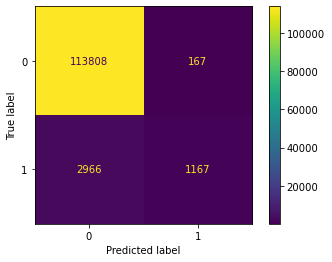

In [94]:
cm=confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()


print('Classification Report:')
print(classification_report(y_test,y_pred))

print('Accuracy:')
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
print()
print('Confusion Matrix:')

model_values = {'Model Name': 'ANN', 'Accuracy': accuracy, 'Time': td}
df_models = df_models.append(model_values, ignore_index = True)

In [95]:
from xgboost import XGBClassifier

In [96]:
xgbc = XGBClassifier()

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=4, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None,
              monotone_constraints=None, n_estimators=100, n_jobs=4,
              nthread=None, num_parallel_tree=None, objective='multi:softprob',
              predictor=None, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, seed=None, silent=None, subsample=1,
              tree_method=None, ...)

In [97]:
t0 = time.time()
xgbc.fit(X_train,y_train)
td = time.time()-t0

C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:56:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [98]:
y_pred = xgbc.predict(X_test)

In [99]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99    113975
         1.0       0.91      0.47      0.62      4133

    accuracy                           0.98    118108
   macro avg       0.95      0.74      0.81    118108
weighted avg       0.98      0.98      0.98    118108

Accuracy:
0.9800436888271751

Confusion Matrix:


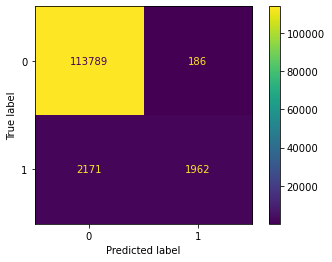

In [100]:
cm=confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()


print('Classification Report:')
print(classification_report(y_test,y_pred))

print('Accuracy:')
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
print()
print('Confusion Matrix:')

model_values = {'Model Name': 'XGBClassifier', 'Accuracy': accuracy, 'Time': td}
df_models = df_models.append(model_values, ignore_index = True)

In [101]:
import lightgbm as lgb
lgbm_model = lgb.LGBMClassifier(
                                  num_leaves = 340,
                                  min_child_weight = 0.07,
                                  feature_fraction = 0.8,
                                  bagging_fraction = 0.7,
                                  min_data_in_leaf = 98,
                                  objective = 'binary',
                                  max_depth = -1,
                                  learning_rate = 0.05,
                                  boosting_type = "gbdt",
                                  bagging_seed = 41,
                                  verbosity = -1,
                                  reg_alpha = 0.6,
                                  reg_lambda = 0.8,
                                  random_state = 49
                        )



In [102]:
t0 = time.time()
lgbm_model.fit(X_train, y_train)
td = time.time()-t0

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=98, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=98
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7


In [103]:
y_pred = lgbm_model.predict(X_test)

In [104]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99    113975
         1.0       0.92      0.53      0.67      4133

    accuracy                           0.98    118108
   macro avg       0.95      0.76      0.83    118108
weighted avg       0.98      0.98      0.98    118108

Accuracy:
0.9819571917228299

Confusion Matrix:


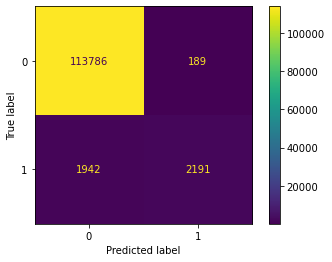

In [105]:
cm=confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()


print('Classification Report:')
print(classification_report(y_test,y_pred))

print('Accuracy:')
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
print()
print('Confusion Matrix:')

model_values = {'Model Name': 'LGBMClassifier', 'Accuracy': accuracy, 'Time': td}
df_models = df_models.append(model_values, ignore_index = True)

In [106]:
df_models.sort_values(by = 'Accuracy',ascending=False,inplace=True)

In [115]:
df_models.reset_index(inplace=True,drop=True)
df_models

,Model Name,Accuracy,Time
0,LGBMClassifier,0.981957,48.911907
1,XGBClassifier,0.980044,277.468931
2,ANN,0.973473,1333.601733
3,RandomForestClassifier,0.968927,120.808890


## Tuning LGBMClassifier to find best parameters

In [108]:
import optuna 
import optuna.visualization as optvis
from sklearn.model_selection import cross_val_score

In [109]:
def lgbm_objective(trial):
    
    n  = trial.suggest_int('n_estimators', 100, 200)
    md = trial.suggest_int('max_depth', -1, 40)
    nl = trial.suggest_int('num_leaves', 50, 500)
    lr = trial.suggest_float('learning_rate', 0, 1, log=False)
    ss = trial.suggest_float('subsample', 0.6, 1, log=False)
    nj = trial.suggest_int('n_jobs', 1, 4) 
    bt = trial.suggest_categorical('boosting_type', ['gbdt', 'dart', 'goss'])
    
    
    clf =  lgb.LGBMClassifier(n_estimators=n, max_depth=md, learning_rate=lr, boosting_type=bt,num_leaves = nl, n_jobs = nj,
                          subsample=ss, random_state=1)
    
    scores = cross_val_score(clf, X_train, y_train, n_jobs=-1, scoring='roc_auc')
    return scores.mean()
    
lgbm_study = optuna.create_study(direction='maximize')
lgbm_study.optimize(lgbm_objective, n_trials=20)

print()
print(lgbm_study.best_value)
print(lgbm_study.best_params)

[I 2022-04-13 23:02:19,921] A new study created in memory with name: no-name-ca6cfa27-d3ef-4e57-9290-0fd00bce8968
[I 2022-04-13 23:04:49,094] Trial 0 finished with value: 0.9552499727559424 and parameters: {'n_estimators': 108, 'max_depth': 11, 'num_leaves': 371, 'learning_rate': 0.32749172532438153, 'subsample': 0.627391403604776, 'n_jobs': 3, 'boosting_type': 'goss'}. Best is trial 0 with value: 0.9552499727559424.
[I 2022-04-13 23:09:55,488] Trial 1 finished with value: 0.7345232492374036 and parameters: {'n_estimators': 134, 'max_depth': 37, 'num_leaves': 332, 'learning_rate': 0.5787426364956367, 'subsample': 0.79575179274433, 'n_jobs': 1, 'boosting_type': 'dart'}. Best is trial 0 with value: 0.9552499727559424.
[I 2022-04-13 23:10:36,572] Trial 2 finished with value: 0.7022664052421798 and parameters: {'n_estimators': 147, 'max_depth': 2, 'num_leaves': 103, 'learning_rate': 0.7695229755038812, 'subsample': 0.7387133163934723, 'n_jobs': 4, 'boosting_type': 'gbdt'}. Best is trial 0 


0.964085187558626
{'n_estimators': 180, 'max_depth': 36, 'num_leaves': 280, 'learning_rate': 0.11581567834146844, 'subsample': 0.9593883005203684, 'n_jobs': 1, 'boosting_type': 'goss'}


In [116]:
y_final = lgbm_model.predict_proba(test)

In [117]:
sub = pd.DataFrame()
sub['TransactionID'] = test_id
sub['isFraud'] = y_final[:, 1]
sub.to_csv(path+'submission_final.csv', index = False)